In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

In [2]:
with h5py.File('train_catvnoncat.h5', 'r') as file:
    train_set_x_original = np.array(file['train_set_x'][:])
    train_set_y = np.array(file['train_set_y'][:])
    train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
    
with h5py.File('test_catvnoncat.h5', 'r') as file:
    classes = np.array(file['list_classes'][:])
    test_set_x_original = np.array(file['test_set_x'][:])
    test_set_y = np.array(file['test_set_y'][:])
    test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))

In [3]:
m_train = train_set_x_original.shape[0]
m_test = test_set_x_original.shape[0]
num_px = train_set_x_original.shape[1]

In [4]:
train_set_x_flatten = train_set_x_original.reshape(train_set_x_original.shape[0], -1).T

In [5]:
test_set_x_flatten = test_set_x_original.reshape(test_set_x_original.shape[0], -1).T

In [6]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

In [7]:
# sigmoid function is defined as sigmoid(z) = 1/(1 + np.exp(z*(-1)))
def sigmoid(z):
    # z is an np array
    a = 1 / (1 + np.exp(z*(-1)))
    return a

In [8]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0
    return w, b

In [9]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    J = np.sum(np.dot(Y, np.log(A).T) + np.dot((1-Y), np.log((1-A)).T))
    J = J/m * -1
    dZ = A - Y
    dw = np.dot(X, dZ.T)
    dw = dw/m
    db = np.sum(dZ)
    db = db/m
    J = np.squeeze(J)
    grads = {"dw": dw,
             "db": db}

    return grads, J

In [10]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [13]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads.get("dw")
        db = grads.get("db")
        if (i%100 == 0):
            costs.append(cost)
            if (print_cost):
                print ("Cost after iteration %i: %f" % (i, cost))
        
        w = w -learning_rate * dw
        b = b - learning_rate * db
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


In [20]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [21]:
def predict(w, b, X):
    m = X.shape[1]
    w = w.reshape(X.shape[0], 1)
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    Y_prediction = np.round(A)
    return Y_prediction


In [22]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


In [25]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [28]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "cat" picture.


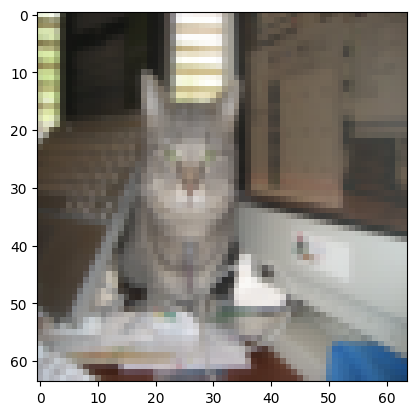

In [34]:
# Correctly predicted sets
index = 7
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0, index]) + ", you predicted that it is a \"" + classes[round(d["Y_prediction_test"][0, index])].decode("utf-8") +  "\" picture.")

y = 0, you predicted that it is a "non-cat" picture.


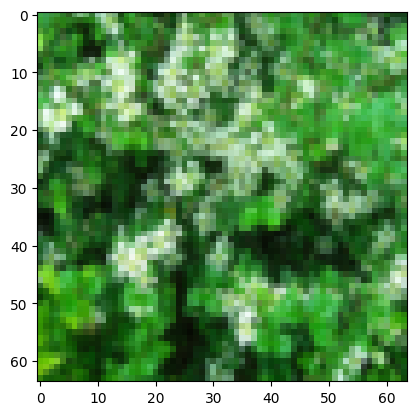

In [37]:
index = 22
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0, index]) + ", you predicted that it is a \"" + classes[round(d["Y_prediction_test"][0, index])].decode("utf-8") +  "\" picture.")

y = 1, you predicted that it is a "cat" picture.


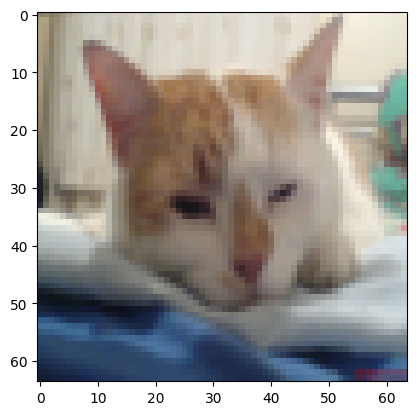

In [38]:
index = 17
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0, index]) + ", you predicted that it is a \"" + classes[round(d["Y_prediction_test"][0, index])].decode("utf-8") +  "\" picture.")

y = 0, you predicted that it is a "cat" picture.


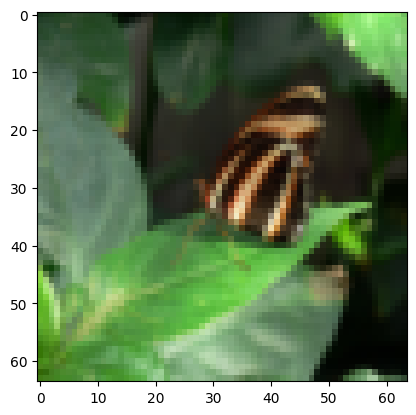

In [39]:
# Incorrectly predicted image
index = 5
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0, index]) + ", you predicted that it is a \"" + classes[round(d["Y_prediction_test"][0, index])].decode("utf-8") +  "\" picture.")

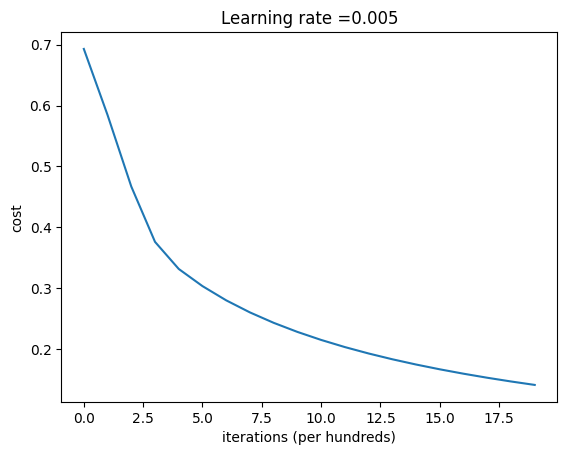

In [40]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()